# Selenium + Requests 조합
bigkinds <br>

In [470]:
# 빅카인즈 홈페이지에서 상세검색
# https://www.bigkinds.or.kr/
# 검색어 ㅡ 무역전쟁
# 검색기간 :2021-01-01에서 현재
# 검색범위 바이그램 지정  (상세검색 - 검색어처리)
# 언론사 :중앙지, 지역종합지 
# 
# 검색한결과의
#   기사제목, 신문사, 일자, 본문  -> 결과물

In [471]:
# 검색 단계까지는 selenium 으로
# 각 기사는 requests + BS4 로

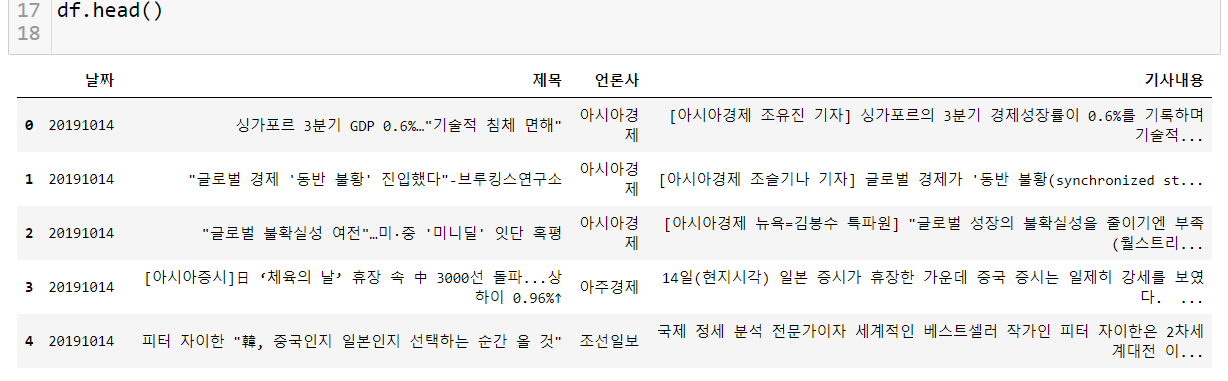

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

In [2]:
driver_path = r'D:\DevRoot\DataSet\bin\chromedriver.exe'
driver = webdriver.Chrome(driver_path)  # <- 드라이버 exe가 있는 경로 명시,  없으면 현재경로로 찾음

In [3]:
driver.get('https://www.bigkinds.or.kr/')
time.sleep(2)

In [4]:
driver.find_element_by_css_selector('#total-search-key').clear()
driver.find_element_by_css_selector('#total-search-key').send_keys('무역전쟁')
driver.find_element_by_css_selector('#total-search-key').send_keys(Keys.ENTER)

In [5]:
# 상세조건 창 활성화 
driver.find_element_by_css_selector('#collapse-step-1').click()

In [6]:
# 중앙지, 지역종합지 체크박스 클릭 
list_ =['중앙지', '지역종합지']
for str_ in list_:
    time.sleep(2)
    chkbox_select = f'#category_provider_group #{str_}'
    chkbox_id = driver.find_element_by_css_selector(chkbox_select)
    driver.execute_script("arguments[0].click();", chkbox_id)

In [7]:
# 기간 버튼 클릭
driver.find_element_by_css_selector('.tab-btn-inner.tab1 a.tab-btn.search-tab_group').click()

In [8]:
time.sleep(2)
driver.find_element_by_css_selector('#search-begin-date').send_keys(Keys.CONTROL+"a")
driver.find_element_by_css_selector('#search-begin-date').send_keys(Keys.DELETE)
driver.find_element_by_css_selector('#search-begin-date').send_keys('2021-01-01')

In [9]:
driver.find_element_by_css_selector('.tab-btn-inner.tab5 a.tab-btn.tab5').click()

In [10]:
time.sleep(2)
driver.find_element_by_xpath("//*[@id='search-filter-type']/option[text()='바이그램']").click()

In [11]:
# 모든 조건 설정 후 검색
driver.find_element_by_css_selector('.btn.btn-md.btn-primary.news-search-btn').click()

In [483]:
time.sleep(2)
# 검색 결과 개수
allNum_str = driver.find_elements_by_css_selector('span.total-news-cnt')[0].text
print(allNum_str)
float_ = int(allNum_str) / 10
iter_n = int(float_) + 1
iter_n

187


19

In [484]:
headers = {
    'Referer': 'https://www.bigkinds.or.kr/v2/news/search.do',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36'
}

list_ = []
for i in range(1, iter_n+1):
    time.sleep(2)
    print("--",i,'페이지',"--")
    data_newsid = driver.find_elements_by_css_selector('#news-results .news-item')
    for el in data_newsid:
        url = f"https://www.bigkinds.or.kr/news/detailView.do?docId={el.get_attribute('data-id')}&returnCnt=1&sectionDiv=1000"
        res = requests.get(url, headers = headers)
        result = res.json()
        result = result['detail']
        list_.append ({
            "날짜" : result['DATE'],
            '제목' : result['TITLE'],
            "언론사" : result['PROVIDER'],
            "기사내용" : result['CONTENT']
        })
        print(result['TITLE'])
    # input text에 페이지 값 넣어주기
    element = driver.find_element_by_css_selector('#paging_news_result')
    driver.execute_script("arguments[0].value="+str(i+1)+";", element)
    element.send_keys(Keys.ENTER)
    
list_

-- 1 페이지 --
산업재편 지연·정책 실패·고비용 고착…대기업도 고용 못늘려
삼성은 미중 반도체 전쟁에서 왜 미국편에 섰을까 [Deep & wide]
[김하림- 조선대 중국어문화학과 교수] 미·중의 대립 관계와 한국의 대응
[씨줄날줄] 링링허우/오일만 논설위원
한미 컨소시엄 구성으로 원전 수주전에서 우위 점한다... "상호 최고의 파트너"
100대 기업 해외 비즈니스 2년 연속 뒷걸음
"수출금융·통관물류 우선 지원 시급"
"코로나19 백신 접종으로 제주수출 경기 호조 전망"
제주 수출기업 10곳 중 9곳 '코로나 피해'
중국 독자공급망도 중국 봉쇄도 ‘비현실적’
-- 2 페이지 --
미국의 中 때리기 3년… 中 대미 수출 78조원 감소
트럼프 ‘관세 폭탄’ 효과… 美, 2020년 中 수입 75兆 줄었다
미국의 제재, 중국 히든챔피언 키운다
[경제직필] 쫄지 마, 한국 경제
코로나 위기가 기회로… 농식품 수출 ‘역대최고’
좋은 일자리 조건
<북리뷰>‘에너지 지도’를 보면 세계 패권이 보인다
[태화강]자원과 기술 부족의 극복
[이기홍 칼럼]경제전쟁 포연 속에 “뒤로 돌아～가” 외치는 文
미국, 중국 무역합의 이행여부 조사…미중 무역전쟁 재연?
-- 3 페이지 --
모사드, 지난해 백신 확보 비밀작전…중국산까지 몰래 들여와 공부했다
[뉴스룸에서] 내정간섭의 국제정치학
‘뉴딜’ 버금가는 3조달러 재정지출… ‘큰 정부’로 가는 美
중국의 방역모델을 어떻게 볼 것인가
[과학의날] ETRI, '소·부·장' 경쟁 최전선 앞장
과학기술계 "문재인 정권 5년 차 과학기술정책 퇴보했다"
[과학에세이] 소·부·장, 세계대전은 시작됐다 /김진천
미 정계의 골칫거리 극우 성향 그린 의원, '아메리카 퍼스트 코커스' 설립 계획 논란
[강인선 LIVE] 백악관이 삼성, LG, SK에 직접 전화하는 이유
프랑스, 최악의 냉해로 와인산지 '농업재해' 선포
-- 4 페이지 --
[서울광장] 美 반도체 동맹 vs 中 반도체 굴기/오일만 논설위원
[한국의 창(窓)] 뒤처지는 한국외교
반도체 전

[{'날짜': '20210531',
  '제목': '산업재편 지연·정책 실패·고비용 고착…대기업도 고용 못늘려',
  '언론사': '문화일보',
  '기사내용': '■ ‘고용·매출 동반부진’ 악순환 <br/><br/><br/><br/>삼성 등 4대 그룹 고용 제외땐 <br/><br/>지난해 일자리 감소폭 더 늘어 <br/><br/>올 1분기도 전년비 1만개 줄어 <br/><br/><br/><br/>매출, 2017년 수준 이하 감소 <br/><br/>순이익도 절반 이하 곤두박질 <br/><br/>적자 그룹도 6곳으로 늘어나<br/><br/><br/><br/>30대 그룹(총 1419개사)의 최근 5년간 고용·실적은 그동안 질이 높고 순증을 해왔다고 안심을 하던 양질의 고용 섹터조차 충격을 받고 있음을 고스란히 보여주고 있다. 전체 상시 종업원 수는 130만 명 안팎에 머물고 순이익은 2년 새 반 토막 수준으로 떨어지는 등 ‘고용·실적의 동반 부진의 고착화’ 현상이 뚜렷했다. <br/><br/><br/><br/>올 1분기에도 대기업 정규직 일자리 수가 1년여 전에 비해 1만 개 이상 감소하는 등 일자리 질 악화 현상은 이어지고 있다. 자칫 고용과 성장 모두 동력이 고갈될 수 있다는 우려가 경제계와 학계에서 나온다. 신종 코로나바이러스 감염증(코로나19) 사태 종식 기대감에 국내외 경제 회복 전망이 제기되지만 규제 개혁을 통해 신사업 진출의 물꼬를 트고, 혁신 기업을 대기업 수준으로 키워내지 못하면 고용·성장 동반 부진의 늪에서 좀처럼 벗어나기 어려울 것으로 분석된다.<br/><br/><br/><br/>◇일자리 질 악화=31일 문화일보와 한국경제연구원이 30대 그룹의 올해 공정거래위원회 신고 자료를 분석한 결과, 이들 그룹의 지난 5년 동안(2015~2020년) 연평균 고용 증가율은 0.6%에 그쳤다. 지난해 상시 종업원 수는 오히려 1년 새 1.4%(1만8377명) 감소했다. 기계·설비, 항공, 유통, 정유, 철강 업종에 속한 그룹사 대부분은 상시 종업원 수가 5년

In [485]:
df = pd.DataFrame(columns = ["날짜", "제목", "언론사", "기사내용"])
for data in list_:
    df.loc[len(df)] = data
df.head()

,날짜,제목,언론사,기사내용
0,20210531,산업재편 지연·정책 실패·고비용 고착…대기업도 고용 못늘려,문화일보,■ ‘고용·매출 동반부진’ 악순환 <br/><br/><br/><br/>삼성 등 4대...
1,20210526,삼성은 미중 반도체 전쟁에서 왜 미국편에 섰을까 [Deep & wide],한국일보,"미국과 중국의 글로벌 반도체 전쟁이 격화하고 있다. 인공지능(AI), 블록체인, 자..."
2,20210526,[김하림- 조선대 중국어문화학과 교수] 미·중의 대립 관계와 한국의 대응,광주일보,트럼프 대통령 시기부터 갈등과 대립 관계에 들어간 미·중은 아직도 예전의 상호 화해...
3,20210525,[씨줄날줄] 링링허우/오일만 논설위원,서울신문,중국 사회에 ‘링링허우’(零零後) 세대의 영향력이 갈수록 커진단다. 링링허우는 문자...
4,20210523,"한미 컨소시엄 구성으로 원전 수주전에서 우위 점한다... ""상호 최고의 파트너""",한국일보,한미 정상이 해외 원전시장에서 협력 강화에 합의했다. 이에 따라 향후 글로벌 원전 ...


In [486]:
len(df)

187